# Wavelet Tranform - 2D Wavelet Decompostion

##In the code we will illustrate the decomposition of the image using DWT into 3 levels. And we will plot the sub-bands

##Mounting

In [3]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
directory = "/content/gdrive/MyDrive/Multimedia_Compression/Final Work/"
os.chdir(directory)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Libraries

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

Intalling the PyWavelets package

In [5]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.5 MB/s eta 0:00:00


##We convert the boat image into a grayscale image and normalize it. Then, we plot the image.

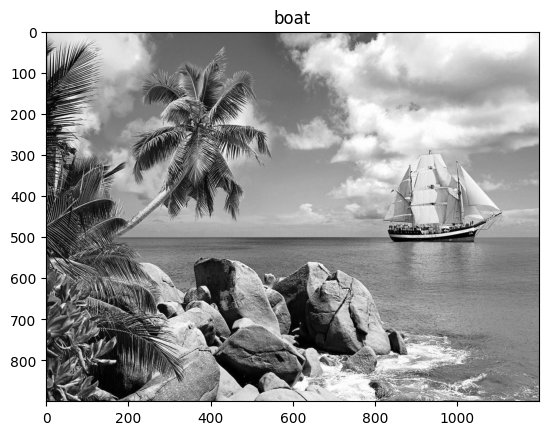

In [6]:
boat = cv2.imread('boat.jpg')
boat_gray = cv2.cvtColor(boat, cv2.COLOR_BGR2GRAY)
boat_gray_norm = boat_gray / 255.0
plt.imshow(boat_gray_norm, cmap='gray')
plt.title('boat')
plt.show()

##Now we extract the wavelet decomposition using the Haar wavelet. We choose 3 levels of decomposition.



In [7]:
import pywt
import numpy as np
# Adjusting image dimensions by padding with zeros
def pad_image(img, shape):
    rows_padding, cols_padding = shape[0] - img.shape[0], shape[1] - img.shape[1]
    return np.pad(img, ((0, rows_padding), (0, cols_padding)), mode='constant')

# Creating the image
def wavelet_img(approx, details):
  output = (approx - approx.min()) / (approx.max() - approx.min()) #normalize LL

  for detail in details:
      LH = (detail[0] - detail[0].min()) / (detail[0].max() - detail[0].min()) #normalize LH
      HL = (detail[1] - detail[1].min()) / (detail[1].max() - detail[1].min()) #normalize HL
      HH = (detail[2] - detail[2].min()) / (detail[2].max() - detail[2].min()) #normalize HH

      shape_padding = output.shape
      LH,HL,HH = pad_image(LH, shape_padding),pad_image(HL, shape_padding), pad_image(HH, shape_padding)
      output = np.vstack([np.hstack([output, HL]), np.hstack([LH, HH])]) # Assembles the images in the order LL(0,0),HL(0,1),LH(1,0),HH(1,1)
  return output

## We print the levels shape and how the image restorage by wavelet

Boat Gray shape: (900, 1200)
Approx shape: (113, 150)
Level shape: 3: [(113, 150), (113, 150), (113, 150)]
Level shape: 2: [(225, 300), (225, 300), (225, 300)]
Level shape: 1: [(450, 600), (450, 600), (450, 600)]


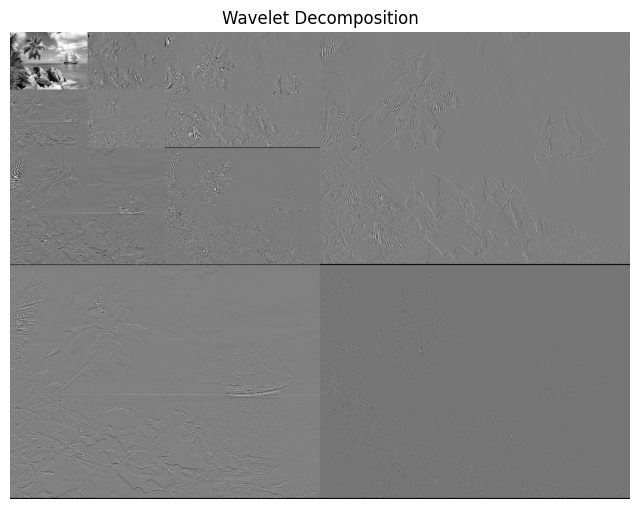

In [8]:
print("Boat Gray shape:", boat_gray.shape)
coeffs = pywt.wavedec2(boat_gray, wavelet='haar', level=3)

approx, details = coeffs[0], coeffs[1:]

print(f"Approx shape: {approx.shape}")
for i, detail in enumerate(details, 1):
    print(f"Level shape: {4-i}: {[d.shape for d in detail]}")


plt.figure(figsize=(8, 8))
plt.imshow(wavelet_img(approx, details), cmap='gray')
plt.title("Wavelet Decomposition")
plt.axis('off')
plt.show()

**Explanation of the output: shape, type, and what it represents.**

**Output**
The output is a list of tuples, where each tuple represents a different level of decomposition.
The resulting output is the expression of the image using a Haar wavelet. The Haar wavelet function is composed of a scaling function and a wavelet function in the following form:

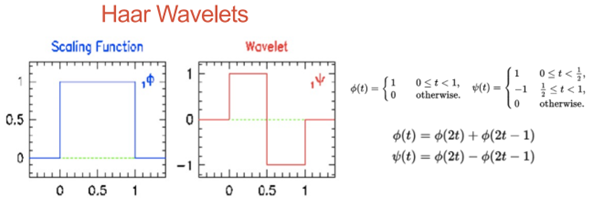

We chose **level = 3**, so the output will be as follows.
We will pass LPF,HPF on the rows and columns and get LL1,LH1,HL1,HH1 (1st order decomposition) Then we will go down to level2 by applying the same manipulation on LL1 and now we will get LL2,LH2,HL2,HH2 which we will store in place of LL1 and we will apply the same manipulation again on LL2 to go down to level3 and we will get LL3,LH3,HL3,HH3.
The approximation from level 1 is LL1 and the details are all the rest of the arrays of order 1
The approximation from level 2 is LL2 and the details are all the rest of the arrays of order 2
The approximation from level 3 is LL3 and the details are all the rest of the arrays of order 3
This can be seen in the following image by G=HPF and H=LPF

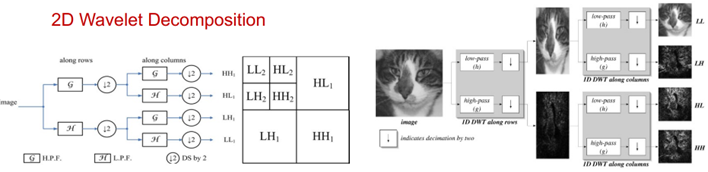

In our case, because level = 3, LL2 passes through the filters again, resulting in:

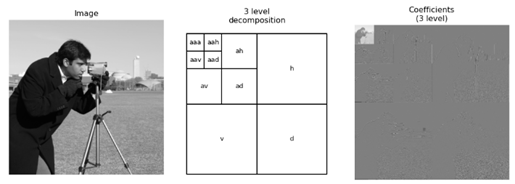


**Shape**
The shape represents the resolution of the image parts. The larger the dimensions, the higher the resolution of the information contained in the array. However, smaller dimensions indicate lower resolution.
It is mean that each level of decomposition is represented as an array with different dimensions, depending on the resolution of that level. We chose level 3, so the image dimensions at level 1 will be the image size divided by 4 (divided by 2 in rows and divided by 2 in columns). Then at level 2, the image size after LL1 is divided by 4, and I again divide by 4, so we get the original image size divided by 16. Then we do the same thing again at level 3, that is, we divide LL2 by 4 and we get the original image size divided by 16. In the same way, we can continue to levels 4,5,6, etc.

**Type**
As we mentioned in the class, the type is a Arrays (lists) of tuples.
Illustration for a dimensional vector (1-dimensional matrix)

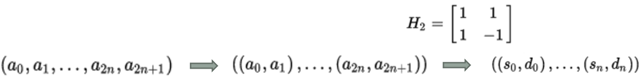

###Detail and approximation coefficients for each level.

In [9]:
# levels
level_1 = pywt.wavedec2(boat_gray, 'haar', level=1)
level_2 = pywt.wavedec2(boat_gray, 'haar', level=2)
level_3 = pywt.wavedec2(boat_gray, 'haar', level=3)


level1_approx = level_1[0]
print("level 1 approximation:", level1_approx.shape)
level1_detail = level_1[1]
print("level 1 detail:", level1_detail[0].shape, level1_detail[1].shape, level1_detail[2].shape)
level2_approx = level_2[0]
print("level 2 approximation:", level2_approx.shape)
level2_detail = level_2[1]
print("level 2 detail:", level2_detail[0].shape, level2_detail[1].shape, level2_detail[2].shape)
level3_approx = level_3[0]
print("level 3 approximation:", level3_approx.shape)
level3_detail = level_3[1]
print("level 3 detail:", level3_detail[0].shape, level3_detail[1].shape, level3_detail[2].shape)

level 1 approximation: (450, 600)
level 1 detail: (450, 600) (450, 600) (450, 600)
level 2 approximation: (225, 300)
level 2 detail: (225, 300) (225, 300) (225, 300)
level 3 approximation: (113, 150)
level 3 detail: (113, 150) (113, 150) (113, 150)


##Display the results

###For level 1

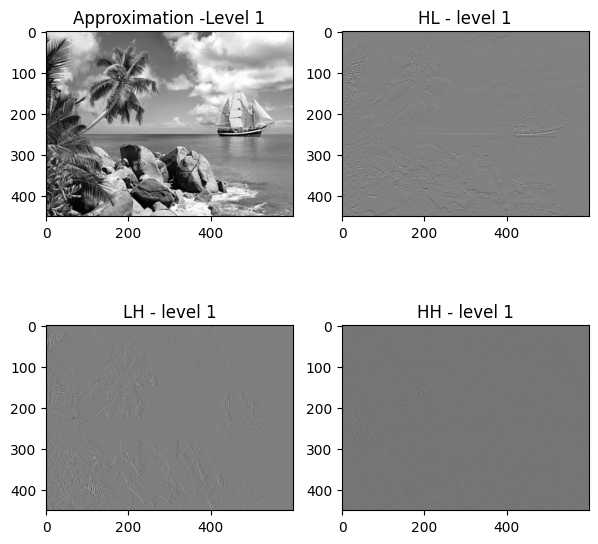

In [11]:
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.imshow(level1_approx, cmap='gray')
plt.title('Approximation -Level 1')
plt.subplot(2, 2, 2)
plt.imshow(level1_detail[0], cmap='gray')
plt.title('HL - level 1')
plt.subplot(2, 2, 3)
plt.imshow(level1_detail[1], cmap='gray')
plt.title('LH - level 1')
plt.subplot(2, 2, 4)
plt.imshow(level1_detail[2], cmap='gray')
plt.title('HH - level 1')
plt.show()

###For level 2

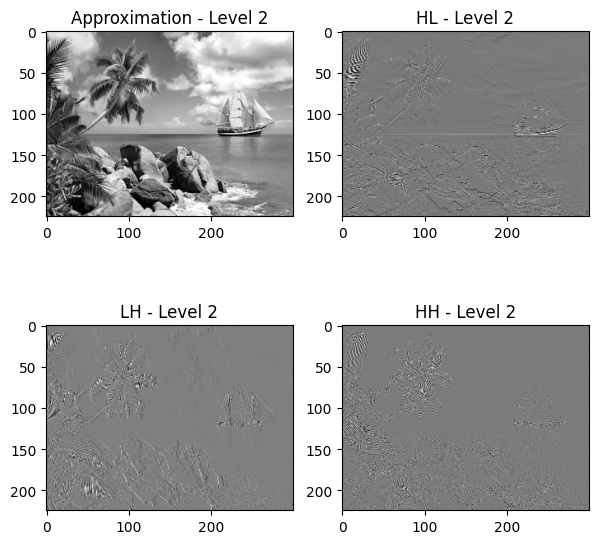

In [12]:
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.imshow(level2_approx, cmap='gray')
plt.title('Approximation - Level 2')
plt.subplot(2, 2, 2)
plt.imshow(level2_detail[0], cmap='gray')
plt.title('HL - Level 2')
plt.subplot(2, 2, 3)
plt.imshow(level2_detail[1], cmap='gray')
plt.title('LH - Level 2')
plt.subplot(2, 2, 4)
plt.imshow(level2_detail[2], cmap='gray')
plt.title('HH - Level 2')
plt.show()

###For level 3

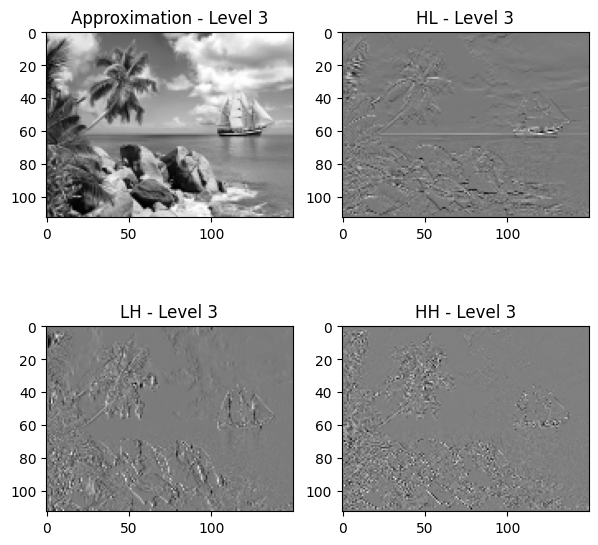

In [13]:
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.imshow(level3_approx, cmap='gray')
plt.title('Approximation - Level 3')
plt.subplot(2, 2, 2)
plt.imshow(level3_detail[0], cmap='gray')
plt.title('HL - Level 3')
plt.subplot(2, 2, 3)
plt.imshow(level3_detail[1], cmap='gray')
plt.title('LH - Level 3')
plt.subplot(2, 2, 4)
plt.imshow(level3_detail[2], cmap='gray')
plt.title('HH - Level 3')
plt.show()

Let's clarify a few things.

**The differences between the detail and the approximation coefficients**  
The differences between the detail and the approximation coefficients is that the approximation represents the lower frequencies of the image whereas the details correspond to the higher frequencies.The approximation coefficients  contain most of the important details of the picture while the details including the fine details of the image like edges.


**The differences between the horizontal, vertical, or diagonal detail coefficients**  
The distinction depends on the specific axis along which the filter is active.  The diagonal component utilizes a high-pass filter (HPF) on the rows and also on the columns, the horizontal component employs an HPF on rows and a low-pass filter (LPF) on columns, whereas the vertical component applies an LPF to rows and an HPF to columns.


**What are the differences between each level?**  
Each level of wavelet decomposition affects the image differently.
On the resolution, each level reduces the image's resolution, decreasing the size of the approximation component.
On the detail, higher levels extract finer details from the lower-resolution approximation of the previous level.
And on data volume, here is less data to process at higher levels since only the reduced approximation component is further decomposed.
Every level is decreasing in factor of 4 (2*2) from the previuse level.

##Now we will implement this using daubechies wavelet

Approx shape: (116, 154)
Level shape: 3: [(116, 154), (116, 154), (116, 154)]
Level shape: 2: [(228, 303), (228, 303), (228, 303)]
Level shape: 1: [(452, 602), (452, 602), (452, 602)]


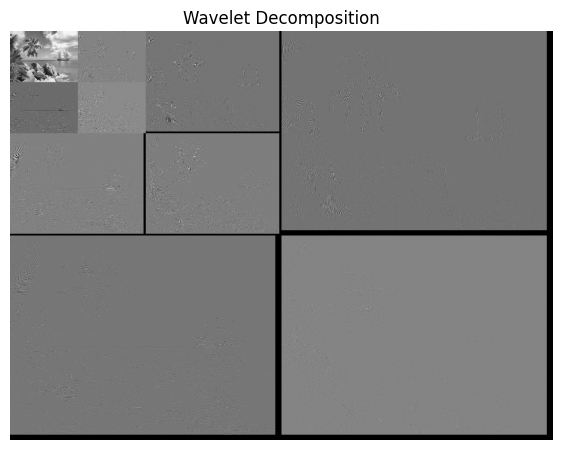

level 1 approximation: (452, 602)
level 1 detail: (452, 602) (452, 602) (452, 602)
level 2 approximation: (228, 303)
level 2 detail: (228, 303) (228, 303) (228, 303)
level 3 approximation: (116, 154)
level 3 detail: (116, 154) (116, 154) (116, 154)


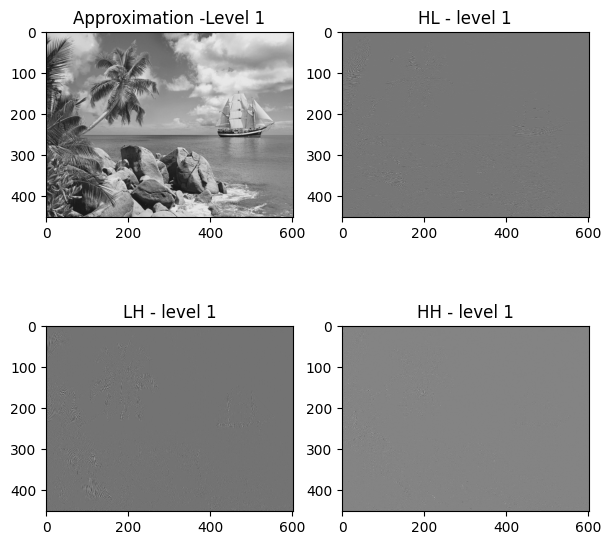

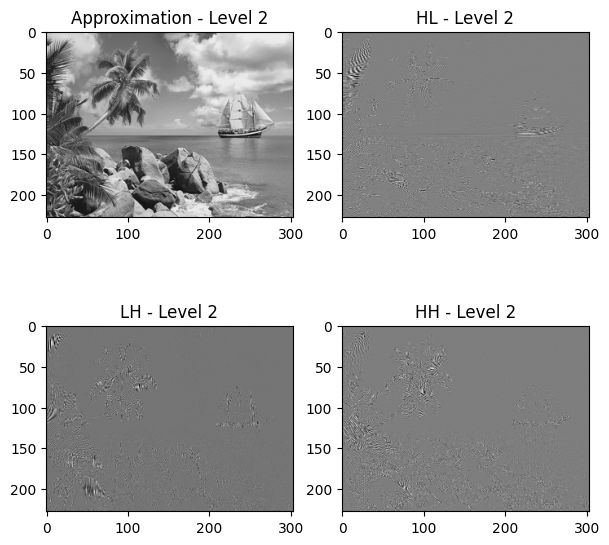

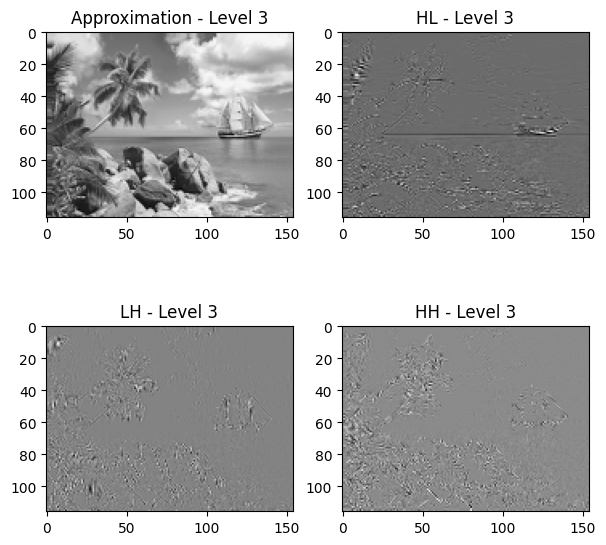

In [21]:
coeffs = pywt.wavedec2(boat_gray, wavelet='db3', level=3)
approx, details = coeffs[0], coeffs[1:]

print(f"Approx shape: {approx.shape}")
for i, detail in enumerate(details, 1):
    print(f"Level shape: {4-i}: {[d.shape for d in detail]}")


plt.figure(figsize=(7, 7))
plt.imshow(wavelet_img(approx, details), cmap='gray')
plt.title("Wavelet Decomposition")
plt.axis('off')
plt.show()

# levels
level_1 = pywt.wavedec2(boat_gray, 'db3', level=1)
level_2 = pywt.wavedec2(boat_gray, 'db3', level=2)
level_3 = pywt.wavedec2(boat_gray, 'db3', level=3)


level1_approx = level_1[0]
print("level 1 approximation:", level1_approx.shape)
level1_detail = level_1[1]
print("level 1 detail:", level1_detail[0].shape, level1_detail[1].shape, level1_detail[2].shape)
level2_approx = level_2[0]
print("level 2 approximation:", level2_approx.shape)
level2_detail = level_2[1]
print("level 2 detail:", level2_detail[0].shape, level2_detail[1].shape, level2_detail[2].shape)
level3_approx = level_3[0]
print("level 3 approximation:", level3_approx.shape)
level3_detail = level_3[1]
print("level 3 detail:", level3_detail[0].shape, level3_detail[1].shape, level3_detail[2].shape)

plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.imshow(level1_approx, cmap='gray')
plt.title('Approximation -Level 1')
plt.subplot(2, 2, 2)
plt.imshow(level1_detail[0], cmap='gray')
plt.title('HL - level 1')
plt.subplot(2, 2, 3)
plt.imshow(level1_detail[1], cmap='gray')
plt.title('LH - level 1')
plt.subplot(2, 2, 4)
plt.imshow(level1_detail[2], cmap='gray')
plt.title('HH - level 1')
plt.show()

plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.imshow(level2_approx, cmap='gray')
plt.title('Approximation - Level 2')
plt.subplot(2, 2, 2)
plt.imshow(level2_detail[0], cmap='gray')
plt.title('HL - Level 2')
plt.subplot(2, 2, 3)
plt.imshow(level2_detail[1], cmap='gray')
plt.title('LH - Level 2')
plt.subplot(2, 2, 4)
plt.imshow(level2_detail[2], cmap='gray')
plt.title('HH - Level 2')
plt.show()

plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.imshow(level3_approx, cmap='gray')
plt.title('Approximation - Level 3')
plt.subplot(2, 2, 2)
plt.imshow(level3_detail[0], cmap='gray')
plt.title('HL - Level 3')
plt.subplot(2, 2, 3)
plt.imshow(level3_detail[1], cmap='gray')
plt.title('LH - Level 3')
plt.subplot(2, 2, 4)
plt.imshow(level3_detail[2], cmap='gray')
plt.title('HH - Level 3')
plt.show()

**Daubechies Wavelets (`dbN`)** are a family of orthogonal wavelets. **`db1` is identical to the Haar wavelet**, providing a simple and fast decomposition. Higher-order Daubechies wavelets (`db2`, `db3`, etc.) offer smoother transformations, reducing sharp transitions in signals.

**Daubechies wavelet functions.**

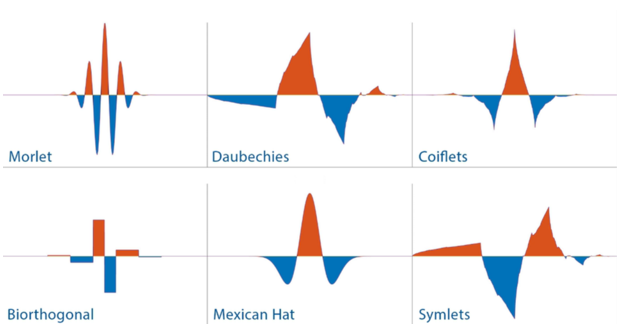

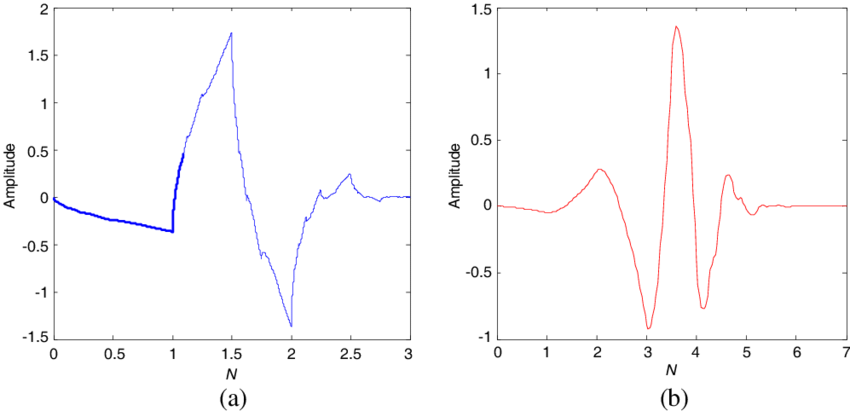

(a) The 2nd order Daubechies wavelet, n = 10; and (b) the 4th order Daubechies wavelet, n = 5.